### Importando as bibliotecas e a base de dados

In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
from scipy.stats import beta
from math import *
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statistics
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import shapiro

In [2]:
#fazendo o upload do dataset, exibindo o total de linhas e colunas, e as primeiras 5 linhas
df = pd.read_csv('Brain.csv')
print(df.shape)
df.head()

(237, 4)


,Homem,Acima45,Tamanho,Peso
0,1,0,4512,1530
1,1,0,3738,1297
2,1,0,4261,1335
3,1,0,3777,1282
4,1,0,4177,1590


In [3]:
#verificando a quantidade de valores por gênero
df.groupby('Homem').count()

,Acima45,Tamanho,Peso
Homem,,,
0,103,103,103
1,134,134,134


In [4]:
#verificando a quantidade de valores por grupo etário
df.groupby('Acima45').count()

,Homem,Tamanho,Peso
Acima45,,,
0,110,110,110
1,127,127,127


In [5]:
#mostrando algumas estatísticas do conjunto de dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Homem,237.0,0.565401,0.496753,0.0,0.0,1.0,1.0,1.0
Acima45,237.0,0.535865,0.499768,0.0,0.0,1.0,1.0,1.0
Tamanho,237.0,3633.991561,365.261422,2720.0,3389.0,3614.0,3876.0,4747.0
Peso,237.0,1282.873418,120.340446,955.0,1207.0,1280.0,1350.0,1635.0


### 1) Há diferença no peso cerebral entre os sexos? E entre os grupos etários?

In [6]:
#algumas métricas da variável Peso
print('Moda: ',stats.mode(df['Peso']))
print('\n')
print('Amplitude: ', df['Peso'].max() - df['Peso'].min())
print('Variância: ', np.var(df['Peso']))
print('Coef Variação: %', df['Peso'].std() / df['Peso'].mean() *100)

Moda:  ModeResult(mode=array([1350], dtype=int64), count=array([8]))


Amplitude:  680
Variância:  14420.718154141974
Coef Variação: % 9.380539352057902


In [7]:
#algumas métricas da variável Peso
print('Estatística de Peso para HOMENS')
df.Peso[(df.Homem == 1)].describe().T

Estatística de Peso para HOMENS


count     134.000000
mean     1331.858209
std       108.933390
min      1120.000000
25%      1252.750000
50%      1313.500000
75%      1400.000000
max      1635.000000
Name: Peso, dtype: float64

In [8]:
print('Estatística de Peso para MULHERES')
df.Peso[(df.Homem == 0)].describe().T

Estatística de Peso para MULHERES


count     103.000000
mean     1219.145631
std       103.829933
min       955.000000
25%      1146.000000
50%      1220.000000
75%      1290.000000
max      1520.000000
Name: Peso, dtype: float64

In [9]:
print('Estatística de Peso para GRUPO ETÁRIO ATÉ 45 ANOS')
df.Peso[(df.Acima45 == 0)].describe().T

Estatística de Peso para GRUPO ETÁRIO ATÉ 45 ANOS


count     110.000000
mean     1304.736364
std       116.409959
min      1027.000000
25%      1227.500000
50%      1301.000000
75%      1370.750000
max      1635.000000
Name: Peso, dtype: float64

In [10]:
print('Estatística de Peso para GRUPO ETÁRIA ACIMA DE 45 ANOS')
df.Peso[(df.Acima45 == 1)].describe().T

Estatística de Peso para GRUPO ETÁRIA ACIMA DE 45 ANOS


count     127.000000
mean     1263.937008
std       120.925712
min       955.000000
25%      1180.000000
50%      1250.000000
75%      1332.500000
max      1620.000000
Name: Peso, dtype: float64

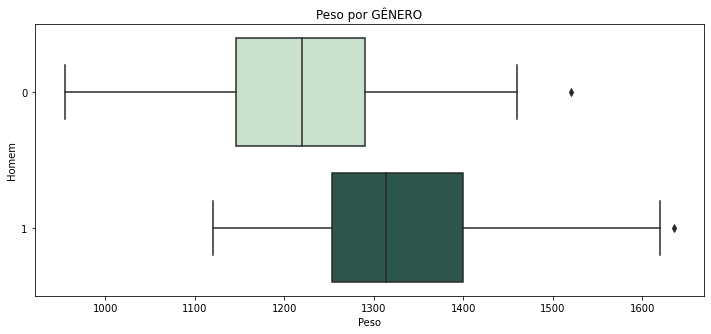

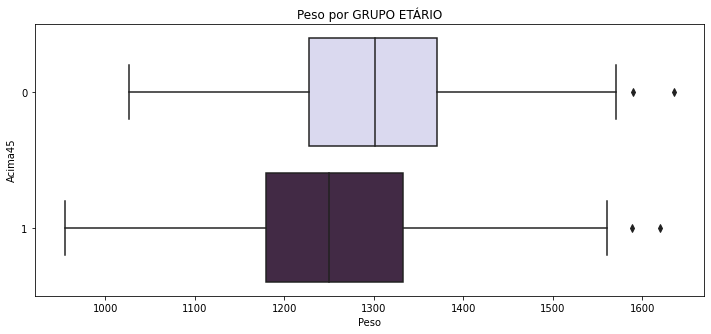

In [11]:
#exibindo o boxplot de peso por gênero e por grupo etário
plt.figure(figsize=(12,5))
plt.title("Peso por GÊNERO")
sns.boxplot(y="Homem", x="Peso", data = df, orient="h", palette = 'ch:2.5,-.2,dark=.3')

plt.figure(figsize=(12,5))
plt.title("Peso por GRUPO ETÁRIO")
sns.boxplot(y="Acima45", x="Peso", data = df, orient="h", palette = 'ch:9.5,-.2,dark=.2')

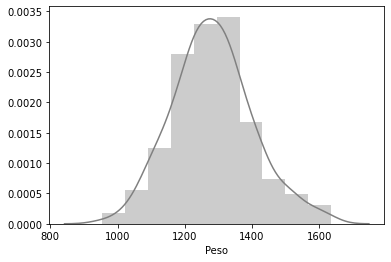

In [12]:
#1º passo: verificando a normalidade dos dados, assumindo que as amostras são independentes entre si
#Histogramas

#histograma de peso
sns.distplot(df['Peso'], bins = 10, hist=True, color='gray', label='Peso')
plt.show()

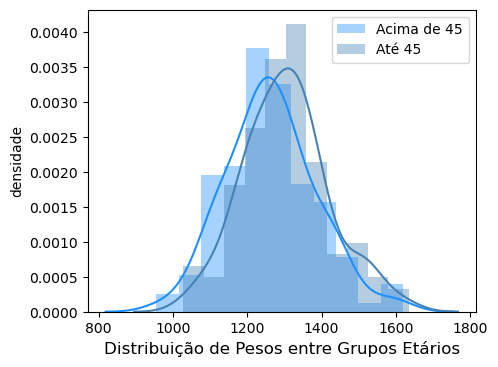

In [13]:
#histograma de frequência de peso entre grupos etários
plt.subplots(figsize=(5,4), dpi=100)
sns.distplot(df.Peso[(df.Acima45 == 1)], color="dodgerblue", label="Acima de 45")
sns.distplot(df.Peso[(df.Acima45 == 0)], color="steelblue", label="Até 45")

plt.xlabel("Distribuição de Pesos entre Grupos Etários", fontsize=12)
plt.ylabel("densidade")
plt.legend();

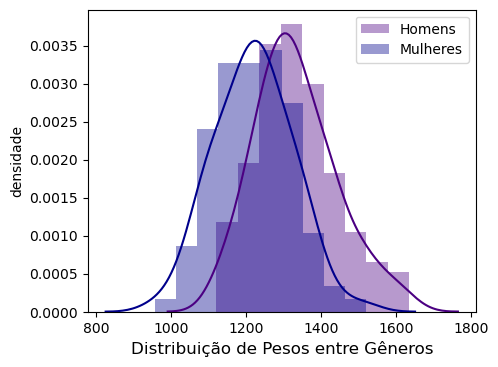

In [14]:
#histograma de frequência de peso entre gêneros
plt.subplots(figsize=(5,4), dpi=100)
sns.distplot(df.Peso[(df.Homem == 1)], color="indigo", label="Homens")
sns.distplot(df.Peso[(df.Homem == 0)], color="darkblue", label="Mulheres")

plt.xlabel("Distribuição de Pesos entre Gêneros", fontsize=12)
plt.ylabel("densidade")
plt.legend();

In [15]:
#Calculando a simetria e a curtose para verificar se os dados de Peso são normalmente distribuídos
print('Curtose e Simetria da Variável Peso como um todo:')
print('excess kurtosis of normal distribution (should be 0): {}'.format(kurtosis(df['Peso'])))
print('skewness of normal distribution (should be 0): {}'.format(skew(df['Peso'])))

Curtose e Simetria da Variável Peso como um todo:
excess kurtosis of normal distribution (should be 0): 0.1747067992701643
skewness of normal distribution (should be 0): 0.26379436775638915


In [16]:
#Normalidade dos pesos por gênero

#homens
print('Curtose e Simetria da Variável Peso para Homens:')
print('excess kurtosis of normal distribution (should be 0): {}'.format(kurtosis(df.Peso[(df.Homem == 1)])))
print('skewness of normal distribution (should be 0): {}'.format(skew(df.Peso[(df.Homem == 1)])))
print('\n')
#mulheres
print('Curtose e Simetria da Variável Peso para Mulheres:')
print('excess kurtosis of normal distribution (should be 0): {}'.format(kurtosis(df.Peso[(df.Homem == 0)])))
print('skewness of normal distribution (should be 0): {}'.format(skew(df.Peso[(df.Homem == 0)])))

Curtose e Simetria da Variável Peso para Homens:
excess kurtosis of normal distribution (should be 0): 0.010969534528364466
skewness of normal distribution (should be 0): 0.505879498073933


Curtose e Simetria da Variável Peso para Mulheres:
excess kurtosis of normal distribution (should be 0): -0.07878729038540255
skewness of normal distribution (should be 0): 0.0952960762484772


In [17]:
#Normalidade dos pesos por grupo etário

#Acima de 45 anos
print('Curtose e Simetria da Variável Peso para pessoas Acima de 45 anos:')
print('excess kurtosis of normal distribution (should be 0): {}'.format(kurtosis(df.Peso[(df.Acima45 == 1)])))
print('skewness of normal distribution (should be 0): {}'.format(skew(df.Peso[(df.Acima45 == 1)])))
print('\n')
#Até 45 anos
print('Curtose e Simetria da Variável Peso para pessoas Até 45 anos:')
print('excess kurtosis of normal distribution (should be 0): {}'.format(kurtosis(df.Peso[(df.Acima45 == 0)])))
print('skewness of normal distribution (should be 0): {}'.format(skew(df.Peso[(df.Acima45 == 0)])))

Curtose e Simetria da Variável Peso para pessoas Acima de 45 anos:
excess kurtosis of normal distribution (should be 0): 0.19377058116223456
skewness of normal distribution (should be 0): 0.27995083100232226


Curtose e Simetria da Variável Peso para pessoas Até 45 anos:
excess kurtosis of normal distribution (should be 0): 0.16968890041766604
skewness of normal distribution (should be 0): 0.31339011504403247


In [18]:
#Realizando mais um teste para atestar a distribuição normal dos dados
#Shapiro-Wilk Normality Test
print('Teste de Normalidade Shapiro-Wilk para a variável "Peso":')
data = df['Peso']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Teste de Normalidade Shapiro-Wilk para a variável "Peso":
stat=0.993, p=0.323
Probably Gaussian


In [19]:
#Realizando mais um teste para atestar a distribuição normal dos dados
#Shapiro-Wilk para peso e por gênero

print('Teste de Normalidade Shapiro-Wilk para a variável "Peso para Homens":')
data = df.Peso[(df.Homem == 1)]
stat, p = shapiro(data)
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

print('\n')
print('Teste de Normalidade Shapiro-Wilk para a variável "Peso para Mulheres":')
data1 = df.Peso[(df.Homem == 0)]
stat, p = shapiro(data1)
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Teste de Normalidade Shapiro-Wilk para a variável "Peso para Homens":
stat=0.98, p=0.03
Probably not Gaussian


Teste de Normalidade Shapiro-Wilk para a variável "Peso para Mulheres":
stat=1.00, p=0.99
Probably Gaussian


In [20]:
#Realizando mais um teste para atestar a distribuição normal dos dados
#Shapiro-Wilk para peso e por grupo etário

print('Teste de Normalidade Shapiro-Wilk para a variável "Peso Acima de 45 Anos":')
data = df.Peso[(df.Acima45 == 1)]
stat, p = shapiro(data)
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

print('\n')
print('Teste de Normalidade Shapiro-Wilk para a variável "Peso Até 45 Anos":')
data1 = df.Peso[(df.Acima45 == 0)]
stat, p = shapiro(data1)
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Teste de Normalidade Shapiro-Wilk para a variável "Peso Acima de 45 Anos":
stat=0.99, p=0.66
Probably Gaussian


Teste de Normalidade Shapiro-Wilk para a variável "Peso Até 45 Anos":
stat=0.99, p=0.42
Probably Gaussian


In [21]:
#Teste de normalidade para a variável peso
#D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = df['Peso']
stat, p = normaltest(data)
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=3.39, p=0.18
Probably Gaussian


In [22]:
#Realizando mais um teste para atestar a distribuição normal dos dados
#D'Agostino's K^2 Normality Test para peso e por gênero

print("Teste de Normalidade D'Agostino's K^2 para a variável 'Peso para Homens':")
data = df.Peso[(df.Homem == 1)]
stat, p = normaltest(data)
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

print('\n')
print("Teste de Normalidade D'Agostino's K^2 para a variável 'Peso para Mulheres':")
data1 = df.Peso[(df.Homem == 0)]
stat, p = normaltest(data1)
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Teste de Normalidade D'Agostino's K^2 para a variável 'Peso para Homens':
stat=5.81, p=0.05
Probably Gaussian


Teste de Normalidade D'Agostino's K^2 para a variável 'Peso para Mulheres':
stat=0.19, p=0.91
Probably Gaussian


In [23]:
#D'Agostino's K^2 Normality Test para peso e por grupo etário
print("Teste de Normalidade D'Agostino's K^2 para a variável 'Peso Acima de 45 Anos':")
data = df.Peso[(df.Acima45 == 1)]
stat, p = normaltest(data)
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

print('\n')
print("Teste de Normalidade D'Agostino's K^2 para a variável 'Peso Até 45 Anos':")
data1 = df.Peso[(df.Acima45 == 0)]
stat, p = normaltest(data1)
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Teste de Normalidade D'Agostino's K^2 para a variável 'Peso Acima de 45 Anos':
stat=2.31, p=0.31
Probably Gaussian


Teste de Normalidade D'Agostino's K^2 para a variável 'Peso Até 45 Anos':
stat=2.40, p=0.30
Probably Gaussian


In [24]:
#Teste de normalidade para a variável peso
from scipy.stats import anderson
data = df.Peso
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.432
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [25]:
#Anderson-Darling Normality Test para peso e por gênero
data = df.Peso[(df.Homem == 1)]
result = anderson(data)
print("Teste de Normalidade Anderson-Darling para a variável 'Peso para Homens':")
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))
print('\n')        
data1 = df.Peso[(df.Homem == 0)]
result = anderson(data1)
print("Teste de Normalidade Anderson-Darling para a variável 'Peso para Mulheres':")
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

Teste de Normalidade Anderson-Darling para a variável 'Peso para Homens':
stat=0.759
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


Teste de Normalidade Anderson-Darling para a variável 'Peso para Mulheres':
stat=0.143
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [26]:
#Anderson-Darling Normality Test para peso e por grupo etário
data = df.Peso[(df.Acima45 == 1)]
result = anderson(data)
print("Teste de NormalidadeAnderson-Darling para a variável 'Peso Acima de 45 Anos':")
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))
print('\n')        
data1 = df.Peso[(df.Acima45 == 0)]
result = anderson(data1)
print("Teste de Normalidade Anderson-Darling para a variável 'Peso Até de 45 Anos':")
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

Teste de NormalidadeAnderson-Darling para a variável 'Peso Acima de 45 Anos':
stat=0.326
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


Teste de Normalidade Anderson-Darling para a variável 'Peso Até de 45 Anos':
stat=0.414
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [27]:
#2º passo: verificando se as amostras que queremos comparar possuem a mesma variância
#criando um subset com valores médios dos pesos entre gêneros
#df_peso_genero = df.pivot_table(index="Homem",values="Peso",aggfunc=("mean"))
#df_peso_genero.reset_index(inplace=True)
#df_peso_genero.head()

In [28]:
#verificando a variância das amostras por gênero
data1 = df.Peso[(df.Homem == 1)]
data2 = df.Peso[(df.Homem == 0)]

print("A variância das médias de peso para Homens é %.2f" % (np.std(data1)**2))
print("A variância das médias de peso para Mulheres é %.2f" % (np.std(data2)**2))

A variância das médias de peso para Homens é 11777.93
A variância das médias de peso para Mulheres é 10675.99


In [29]:
#teste Leve de igualdade de variâncias entre amostras
stats.levene(data1,data2)

#ou seja, com alpha=0.05, o teste Levene não descartou a hipótese H0, de igualdade das variâncias

LeveneResult(statistic=0.08798545130505911, pvalue=0.767016022271913)

In [30]:
# Teste t de Student (bicaudal) para média de duas populações Normais com variâncias iguais
stats.ttest_ind(data1,data2)

#ou seja, com alpha=0.05, o teste T de Student descartou a hipótese H0, de igualdade das médias

Ttest_indResult(statistic=8.05765147908099, pvalue=3.919241152559185e-14)

In [31]:
#verificando a variância das amostras por grupo etário
data3 = df.Peso[(df.Acima45 == 1)]
data4 = df.Peso[(df.Acima45 == 0)]

print("A variância das médias de peso para Acima de 45 anos é %.2f" % (np.std(data3)**2))
print("A variância das médias de peso para Até 45 anos é %.2f" % (np.std(data4)**2))

A variância das médias de peso para Acima de 45 anos é 14507.89
A variância das médias de peso para Até 45 anos é 13428.09


In [32]:
#teste Leve de igualdade de variâncias entre amostras
stats.levene(data3,data4)
#ou seja, o teste Levene não descartou a hipótese H0, de igualdade das variâncias

LeveneResult(statistic=0.1572368955265971, pvalue=0.6920731219043006)

In [33]:
# Teste t de Student (bicaudal) para média de duas populações Normais com variâncias iguais
stats.ttest_ind(data3,data4)

#Ao considerar alpha=0.05 a Hipótese Nula H0 (igualdade de médias) pode ser rejeitada, 
#pois o valor p é menor que alpha

Ttest_indResult(statistic=-2.6355362085897975, pvalue=0.008959602315452554)

### 2) O tamanho da cabeça é preditor do peso cerebral e, neste caso, há diferença nessa relação entre os sexos e entre os grupos etários?

In [34]:
#exibindo algumas métricas
df.describe()

,Homem,Acima45,Tamanho,Peso
count,237.000000,237.000000,237.000000,237.000000
mean,0.565401,0.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,0.000000,0.000000,2720.000000,955.000000
25%,0.000000,0.000000,3389.000000,1207.000000
50%,1.000000,1.000000,3614.000000,1280.000000
75%,1.000000,1.000000,3876.000000,1350.000000
max,1.000000,1.000000,4747.000000,1635.000000


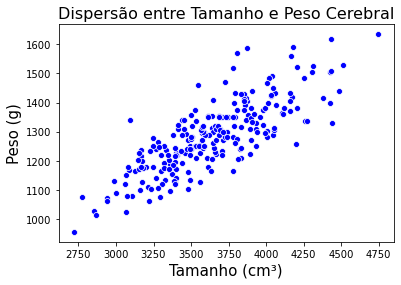

In [35]:
#scatter plot
sns.scatterplot(x=df.Tamanho,y=df.Peso,data=df, color='b')
plt.xlabel("Tamanho (cm³)", fontsize=15)
plt.ylabel("Peso (g)", fontsize=15)
plt.title('Dispersão entre Tamanho e Peso Cerebral',  fontsize=16)
plt.show()

#### Parece que existe uma associação linear positiva entre Peso e Tamanho.

In [36]:
#plotando a correlação entre as variáveis
df.corr()

,Homem,Acima45,Tamanho,Peso
Homem,1.000000,0.088652,0.514050,0.465266
Acima45,0.088652,1.000000,-0.105428,-0.169438
Tamanho,0.514050,-0.105428,1.000000,0.799570
Peso,0.465266,-0.169438,0.799570,1.000000


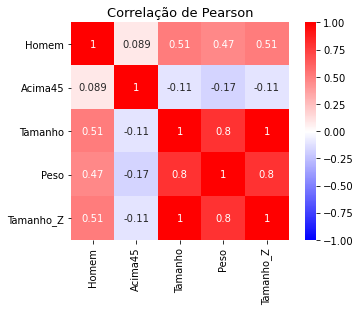

In [58]:
sns.heatmap(df.corr(), cmap='bwr', vmax=1, vmin=-1,center=0, square=True, annot=True)
plt.title('Correlação de Pearson',  fontsize=13)
plt.show()

In [38]:
from statsmodels.formula.api import ols

#Ajusta o modelo de regressão linear múltipla com Peso como variável resposta, usando somente a interação
#com a variável Tamanho
mod = ols('df.Peso ~ Homem + Acima45 + Tamanho',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                df.Peso   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           2.94e-53
Time:                        12:45:01   Log-Likelihood:                -1345.7
No. Observations:                 237   AIC:                             2699.
Df Residuals:                     233   BIC:                             2713.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    395.5079     52.999      7.463      0.0

In [39]:
#normalização das variável preditora com Z-Score
df['Tamanho_Z'] = (df.Tamanho - df.Tamanho.mean()) / (df.Tamanho.max() - df.Tamanho.min())
df.head()

,Homem,Acima45,Tamanho,Peso,Tamanho_Z
0,1,0,4512,1530,0.433157
1,1,0,3738,1297,0.051312
2,1,0,4261,1335,0.309328
3,1,0,3777,1282,0.070552
4,1,0,4177,1590,0.267888


In [40]:
#Ajusta o modelo de regressão linear múltipla com Peso como variável resposta
mod = ols('df.Peso ~ Homem',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                df.Peso   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     64.93
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           3.92e-14
Time:                        12:45:01   Log-Likelihood:                -1442.2
No. Observations:                 237   AIC:                             2888.
Df Residuals:                     235   BIC:                             2895.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1219.1456     10.518    115.908      0.0

In [41]:
#Ajusta o modelo de regressão linear múltipla com Peso como variável resposta
mod = ols('df.Peso ~ Acima45',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                df.Peso   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     6.946
Date:                Sun, 21 Jun 2020   Prob (F-statistic):            0.00896
Time:                        12:45:01   Log-Likelihood:                -1467.6
No. Observations:                 237   AIC:                             2939.
Df Residuals:                     235   BIC:                             2946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1304.7364     11.332    115.136      0.0

In [42]:
#Ajusta o modelo de regressão linear múltipla com Peso como variável resposta
mod = ols('df.Peso ~ Tamanho_Z',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                df.Peso   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           5.96e-54
Time:                        12:45:01   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1282.8734      4.705    272.683      0.0

In [43]:
#Ajusta o modelo de regressão linear múltipla com Peso como variável resposta, usando somente a interação
#com a vriável Tamanho
mod = ols('df.Peso ~ Homem * Acima45 + Tamanho_Z',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                df.Peso   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           3.05e-52
Time:                        12:45:01   Log-Likelihood:                -1345.5
No. Observations:                 237   AIC:                             2701.
Df Residuals:                     232   BIC:                             2718.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1279.4246     10.115    126.490

In [44]:
#Ajusta o modelo de regressão linear múltipla com Peso como variável resposta, usando somente a interação
#com a vriável Tamanho
mod = ols('df.Peso ~ Homem + Acima45 + Tamanho_Z',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                df.Peso   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           2.94e-53
Time:                        12:45:01   Log-Likelihood:                -1345.7
No. Observations:                 237   AIC:                             2699.
Df Residuals:                     233   BIC:                             2713.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1282.9713      8.703    147.412      0.0

Modelo | Variáveis                                        | AIC   | BIC   | $$R^2_a$$
-------|--------------------------------------------------|-------|-------|-------
1      | Homem, Acima45, Tamanho_Z, sem interações        | 2699  | 2713  | 65,3%
2      | Homem * Acima45, Tamanho_Z                       | 2701  | 2718  | 65,4%
3      | Tamanho                                          | 2705  | 2711  | 63,9%
4      | Homem                                            | 2888  | 2895  | 21,6%
5      | Acima45                                          | 2939  | 2946  | 2,9%

In [45]:
#como o modelo 'df.Peso ~ Homem + Acima45 + Tamanho_Z' com todas as interações apresentou maior desempenho, 
#vou analisar os resíduos
res.mse_resid

5092.320159230041

In [46]:
# valores preditos de E(Y)
ypred=res.fittedvalues

# resíduo=observado-ajustado
residuo = res.resid

# objeto para a análise de pontos influentes
infl = res.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

# DFFITS
(dffits,p) = infl.dffits

# Distância de Cook
(cook,p) = infl.cooks_distance

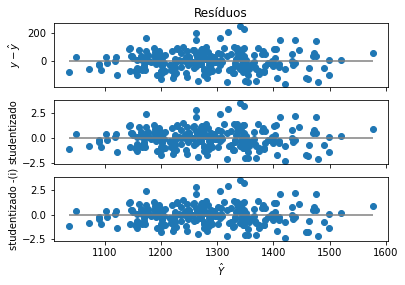

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(ypred, residuo)
ax1.set_ylabel('$y-\hat{y}$')
ax1.set_title('Resíduos')
ax1.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax2.scatter(ypred, res_stud)
ax2.set_ylabel('studentizado')
ax2.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.scatter(ypred, res_stud_del)
ax3.set_ylabel('studentizado -(i)')
ax3.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.set_xlabel('$\hat{Y}$')

for ax in fig.get_axes():
    ax.label_outer()

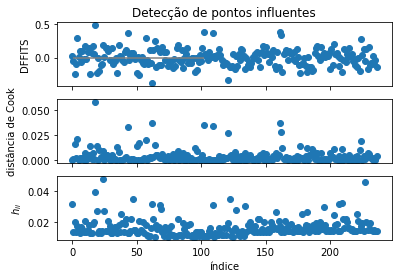

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(df.index, dffits)
ax1.set_ylabel('DFFITS')
ax1.set_title('Detecção de pontos influentes')
ax1.hlines(0,xmin=1,xmax=102,color='gray')
ax2.scatter(df.index, cook)
ax2.set_ylabel('distância de Cook')
ax3.scatter(df.index, hii)
ax3.set_ylabel('$h_{ii}$')
ax3.set_xlabel('índice')

for ax in fig.get_axes():
    ax.label_outer()

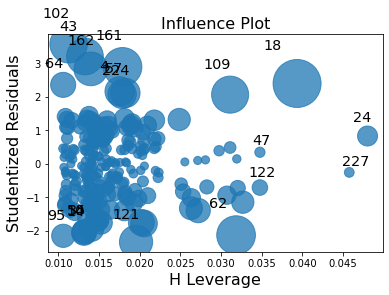

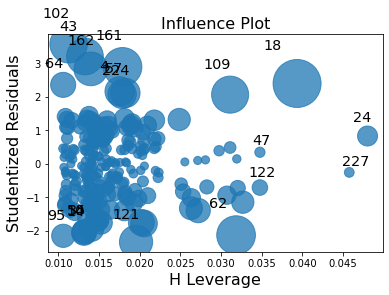

In [49]:
import statsmodels.api as sm

# Gráficos dos resíduos
sm.graphics.influence_plot(res)

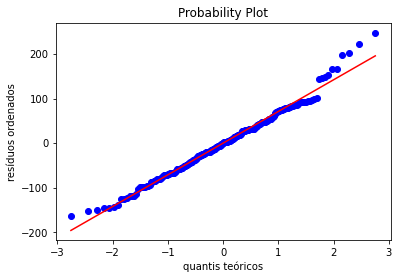

In [50]:
stats.probplot(residuo, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()

### 3) Estime o peso médio do cérebro de homens e de mulheres (pontual e intervalar).

In [51]:
#para o estimador pontual
peso_homem_pontual = df.Peso[(df.Homem == 1)].mean()
peso_mulher_pontual = df.Peso[(df.Homem == 0)].mean()

In [52]:
print('Estimador Pontual Peso Homem: ', peso_homem_pontual)

Estimador Pontual Peso Homem:  1331.858208955224


In [53]:
print('Estimador Pontual Peso Mulher: ', peso_mulher_pontual)

Estimador Pontual Peso Mulher:  1219.1456310679612


In [54]:
#estimador intervalar
peso_homem = df.Peso[(df.Homem == 1)]
peso_mulher = df.Peso[(df.Homem == 0)]

In [55]:
#estimador intervalar peso homem
print('Estimador Intervalar Peso Homem:')
stats.t.interval(0.95, len(peso_homem)-1, loc=np.mean(peso_homem), scale=stats.sem(peso_homem))

Estimador Intervalar Peso Homem:


(1313.2447792718747, 1350.4716386385733)

In [56]:
#estimador intervalar peso mulher
print('Estimador Intervalar Peso Mulher:')
stats.t.interval(0.95, len(peso_mulher)-1, loc=np.mean(peso_mulher), scale=stats.sem(peso_mulher))

Estimador Intervalar Peso Mulher:


(1198.8531509366069, 1239.4381111993155)

|Estimador de Peso Cerebral| |   |
|--------|---|---|
|Gênero | Pontual |Intervalar|
|Homem | 1331.858 |1313.244 ~ 1350.471|
|Mulher | 1219.145 | 1198.853 ~ 1239.438|


### Como é possível notar, ambos os estimadores pontuais estão dentro dos intervalos estimados